###  accessing the online data

In [4]:
list(intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"))

['CN', 'EU', 'JAPAN', 'NCAR', 'NERSC', 'UK', 'online']

In [4]:
current_location = "online"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]

In [4]:
list(cat)

['ERA5',
 'IR_IMERG',
 'JRA3Q',
 'MERRA2',
 'casesm2_10km_nocumulus',
 'icon_d3hp003',
 'icon_d3hp003aug',
 'icon_d3hp003feb',
 'icon_ngc4008',
 'ifs_tco3999-ng5_deepoff',
 'ifs_tco3999-ng5_rcbmf',
 'ifs_tco3999-ng5_rcbmf_cf',
 'nicam_gl11',
 'scream-dkrz',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9_TBv1p2',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

In [5]:
model_accessors = dict(zip(["icon", "um", "era", "imerg"], ["icon_d3hp003", "um_glm_n2560_RAL3p3", "ERA5", "IR_IMERG"]))
model_accessors

{'icon': 'icon_d3hp003',
 'um': 'um_glm_n2560_RAL3p3',
 'era': 'ERA5',
 'imerg': 'IR_IMERG'}

In [6]:
import pandas as pd

icon_params = pd.DataFrame(cat[model_accessors["icon"]].describe()["user_parameters"])
um_params = pd.DataFrame(cat[model_accessors["um"]].describe()["user_parameters"])
era5_params = pd.DataFrame(cat[model_accessors["era"]].describe()["user_parameters"])
imerg_params = pd.DataFrame(cat[model_accessors["imerg"]].describe()["user_parameters"])

In [8]:
imerg_params

,name,description,type,allowed,default
0,zoom,zoom resolution of the dataset,int,[9],9


In [9]:
icon_z5_t1h = cat[model_accessors["icon"]](zoom=5, time_method="inst", time='PT1H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z5_t3h = cat[model_accessors["icon"]](zoom=5, time_method="mean", time='PT3H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z5_t1D = cat[model_accessors["icon"]](zoom=5, time_method="mean", time='P1D').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
icon_z10_t1D = cat[model_accessors["icon"]](zoom=10, time_method="mean", time='P1D').to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 

um_z5_t1h = cat[model_accessors["um"]](zoom=5, time='PT1H').to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 
um_z5_t3h = cat[model_accessors["um"]](zoom=5, time='PT3H').to_dask().sel(time = slice('2020--01-01', '2021-04-01'))

era_z5 = cat[model_accessors["era"]](zoom=5).to_dask().sel(time = slice('2020--01-01', '2021-04-01')) 
imerg = cat[model_accessors["imerg"]](zoom=9).to_dask().sel(time = slice('2020--01-01', '2021-04-01'))
# ds_z10 = cat["icon_d3hp003"](zoom=10, time_method="mean", time='P1D').to_dask() 
# ds_z10

ServerDisconnectedError: Failed to decode variable 'time': Server disconnected

In [ ]:
imerg.time

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
with ProgressBar():
    loaded_dat = (((era_z5.tp)*1000).mean('time')).load()

In [ ]:
era_z5.tp

In [ ]:
plt.figure(figsize=(10, 5))
cf = egh.healpix_show(loaded_dat, vmax=10)
plt.colorbar(cf)

In [ ]:
plt.figure(figsize=(10, 5))
cf = egh.healpix_show((icon_z5_t1D.pr*86400).mean('time'), vmax=10)
plt.colorbar(cf)


In [77]:
um_z5_t1h

<xarray.Dataset> Size: 12GB
Dimensions:  (cell: 12288, time: 10489)
Coordinates:
  * cell     (cell) int64 98kB 0 1 2 3 4 5 ... 12283 12284 12285 12286 12287
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/26)
    clivi    (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    clt      (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    clwvi    (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    hflsd    (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    hfssd    (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    huss     (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    ...       ...
    tas      (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    ts       (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    uas      (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    vas      (time, cell) float32 516MB dask.array<chunksize=(64, 12288), meta=np.ndarray>
    orog     (cell) float64 98kB dask.array<chunksize=(12288,), meta=np.ndarray>
    sftlf    (cell) float64 98kB dask.array<chunksize=(12288,), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

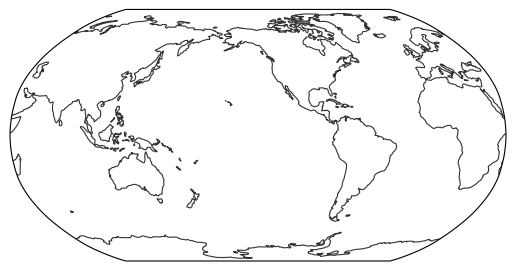

In [72]:
plt.figure(figsize=(10, 5))
cf = egh.healpix_show((um_z5_t1h.pr*86400).mean('time'), vmax=10)
plt.colorbar(cf)